# Mounting the colab notebook with g-drive.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# For importing the Module from drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Importing the module which is trained with a particular model.

In [0]:
#getting this id from the colab file.
#If we use run this project on local computer, we do not need to take the id , we can directly import the Caption_it module

In [0]:
your_module = drive.CreateFile({'id':'1F9LPYGqFrD7fx7LtSZ_SWTjGdbgfiEQv'})

In [0]:
your_module.GetContentFile('Caption_it.py')

In [0]:
import Caption_it 

Using TensorFlow backend.


102858752/102853048 [==============================] - 8s 0us/step


In [0]:
cap=Caption_it.caption_this_image("gdrive/My Drive/Image Caption/Images/107318069_e9f2ef32de.jpg")
print(cap)

a hot hot hot balloon performs a


In [0]:
# import json 
# import os

# total_images_colab = []
# for root, dirs, files in os.walk("gdrive/My Drive/Image Caption/Images"):
#     for file in files:
#         if file.endswith(".jpg"):
#         	total_images_colab.append(file)

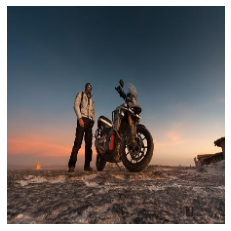

In [0]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("gdrive/My Drive/Image Caption2/caption example.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
plt.axis("off")
plt.imshow(img)

In [0]:
cap2=Caption_it.caption_this_image("gdrive/My Drive/Image Caption2/caption example.jpg")
print(cap2)

dirt bike riders on a track


In [0]:
# cap2=Caption_it.caption_this_image(img)
# print(cap2)

str

# Converting text to speech.

In [0]:
pip install gtts

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=bb142b42e93762e37aa9e49213c28bcb7fc7acedb92c7da3f49860d9cafaaf18
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [0]:
from gtts import gTTS

In [0]:
import os
from IPython.display import Audio
cap21="Despacito "
language = 'en'
myobj = gTTS(text=cap21, lang=language, slow=False) 

In [0]:
myobj.save("welcome.mp3")
# os.system("mpg321 welcome.mp3") 
sound_file = "welcome.mp3"
Audio(sound_file, autoplay=True) 

# For taking pictures directly from webcam. If using from colab otherwise
# to follow these steps, we can directly use the web cam using opencv and 
# upload image here.

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


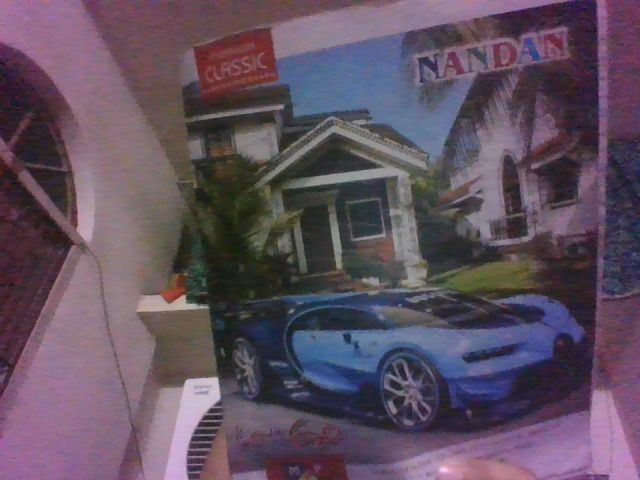

[Errno 2] No such file or directory: 'gdrive/My Drive/Image Caption2/capture images/image0.jpg'


In [0]:
from IPython.display import Image
try:
  i=0
  count = 0
  path = 'gdrive/My Drive/Image Caption2/capture images/'
  while True:
     filename = take_photo()
     print('Saved to {}'.format(filename))
  # Show the image which was just taken.
     
     if count%5==0:
       display(Image(filename))
       img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
       cv2.imwrite(os.path.join(path , 'image'+str(i)+'.jpg'), img)
       photo = 'image'+str(i)
       caption = Caption_it.caption_this_image('gdrive/My Drive/Image Caption2/capture images/'+ photo +'.jpg')
       print(caption)
       i=i+1
     count = count+1
  
     if count == 10:
       break
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
# import cv2
# img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)
# i = 0
# path = 'gdrive/My Drive/Image Caption2/capture images/'
# cv2.imwrite(os.path.join(path , 'waka'+str(i)+'.jpg'), img)

In [0]:
caption = Caption_it.caption_this_image('gdrive/My Drive/Image Caption2/capture images/image1.jpg')
print(caption)

a man in a red shirt is sitting in a chair chair a colorful blanket
